In [1]:
import plotly.io as pio
pio.renderers.default = "png"

import sys
sys.path.append('../../')

from aztec_gddt.analysis.execute import execute_sim, complexity_desc
from aztec_gddt.analysis.visualizations import plot_agg_kpis, plot_inspect_vars
from aztec_gddt.analysis.metrics import *
from aztec_gddt.scenario_experiments import *
from aztec_gddt.types import *

In [2]:
from aztec_gddt.helper_types import ExperimentParamSpec

exp_spec = ExperimentParamSpec(
    params_swept_control={
    },
    params_swept_env={
        'JUICE_PER_GWEI_SCENARIO': [JuiceGweiExchangeRateScenario.Stochastic, JuiceGweiExchangeRateScenario.StrictlyIncreasing, JuiceGweiExchangeRateScenario.StrictlyDecreasing, JuiceGweiExchangeRateScenario.Constant],
        'JUICE_PER_GWEI_MEAN': [1.1e-6],
        'JUICE_PER_GWEI_COV': [0.1, 0.3]

    },
    N_timesteps=500,
    N_samples=1,
    N_config_sample=-1
)

In [3]:
CONTROL_PARAMS = list(exp_spec.params_swept_control.keys())

sim_df, exec_time = execute_sim(exp_spec, return_sim_df=True, upload=False, parallelize=False)


2025-02-05 18:10:12 - aztec-gddt-v2 - INFO
{exp_spec.label} Run invoked at 2025-02-05 18:10:12.415328

2025-02-05 18:10:12 - aztec-gddt-v2 - INFO
 dimensions: N_jobs=7, N_t=500, N_sweeps=8, N_mc=1, N_trajectories=8, N_measurements=4,000

2025-02-05 18:10:12 - aztec-gddt-v2 - INFO
 starting at 2025-02-05 18:10:12.416027, (0:00:00.000699 since invoke)

2025-02-05 18:10:14 - aztec-gddt-v2 - INFO
 Run finished at 2025-02-05 18:10:14.512967, (0:00:02.096940 since sim start)

2025-02-05 18:10:14 - aztec-gddt-v2 - INFO
 Run Performance Numbers; Duration (s): 2.10, Measurements Per Second: 1,907.54 M/s, Measurements per Job * Second: 272.51 M/(J*s), Jobs * Seconds per Trajectory : 1.83


In [4]:
print(complexity_desc(exp_spec))


    #### Computational Complexity:
    1. Total number of parameter combinations: 8
    2. Total number of Monte Carlo runs per parameter combination: 1
    3. Total number of trajectories: 8
    4. Total number of timesteps per trajectory: 500
    5. Total number of state measurements: 4,000
    


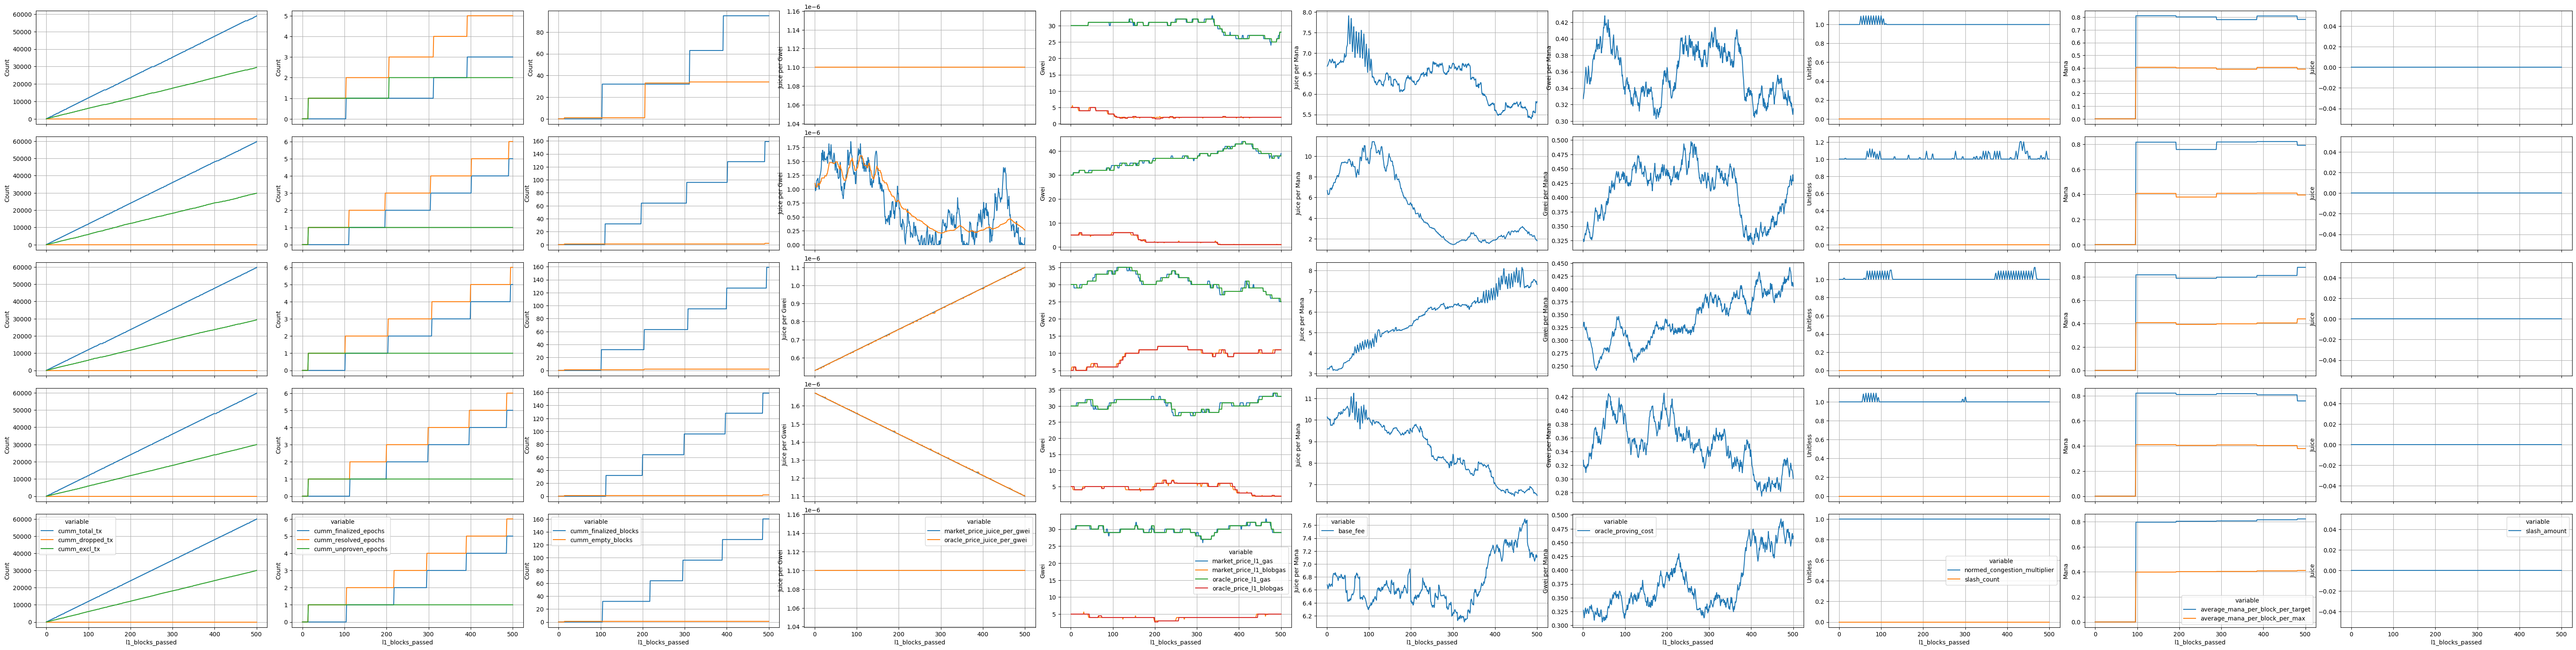

In [5]:
plot_inspect_vars(sim_df)

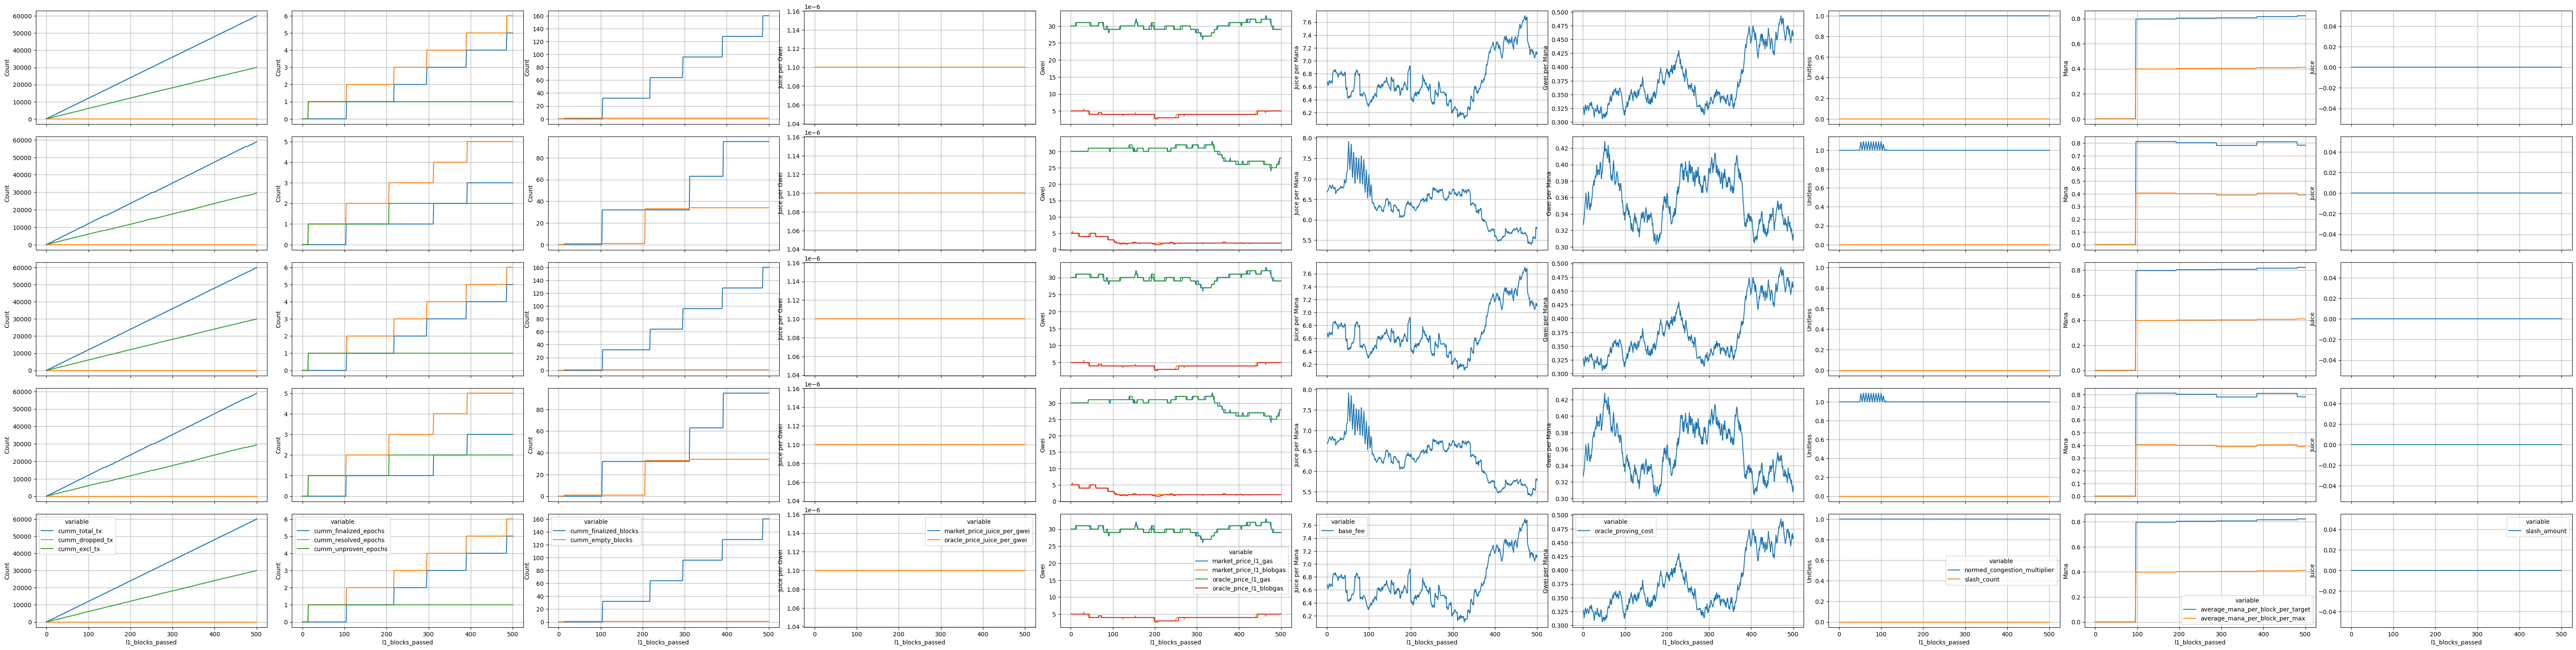

In [6]:
plot_inspect_vars(sim_df[sim_df.JUICE_PER_GWEI_SCENARIO == JuiceGweiExchangeRateScenario.Constant])

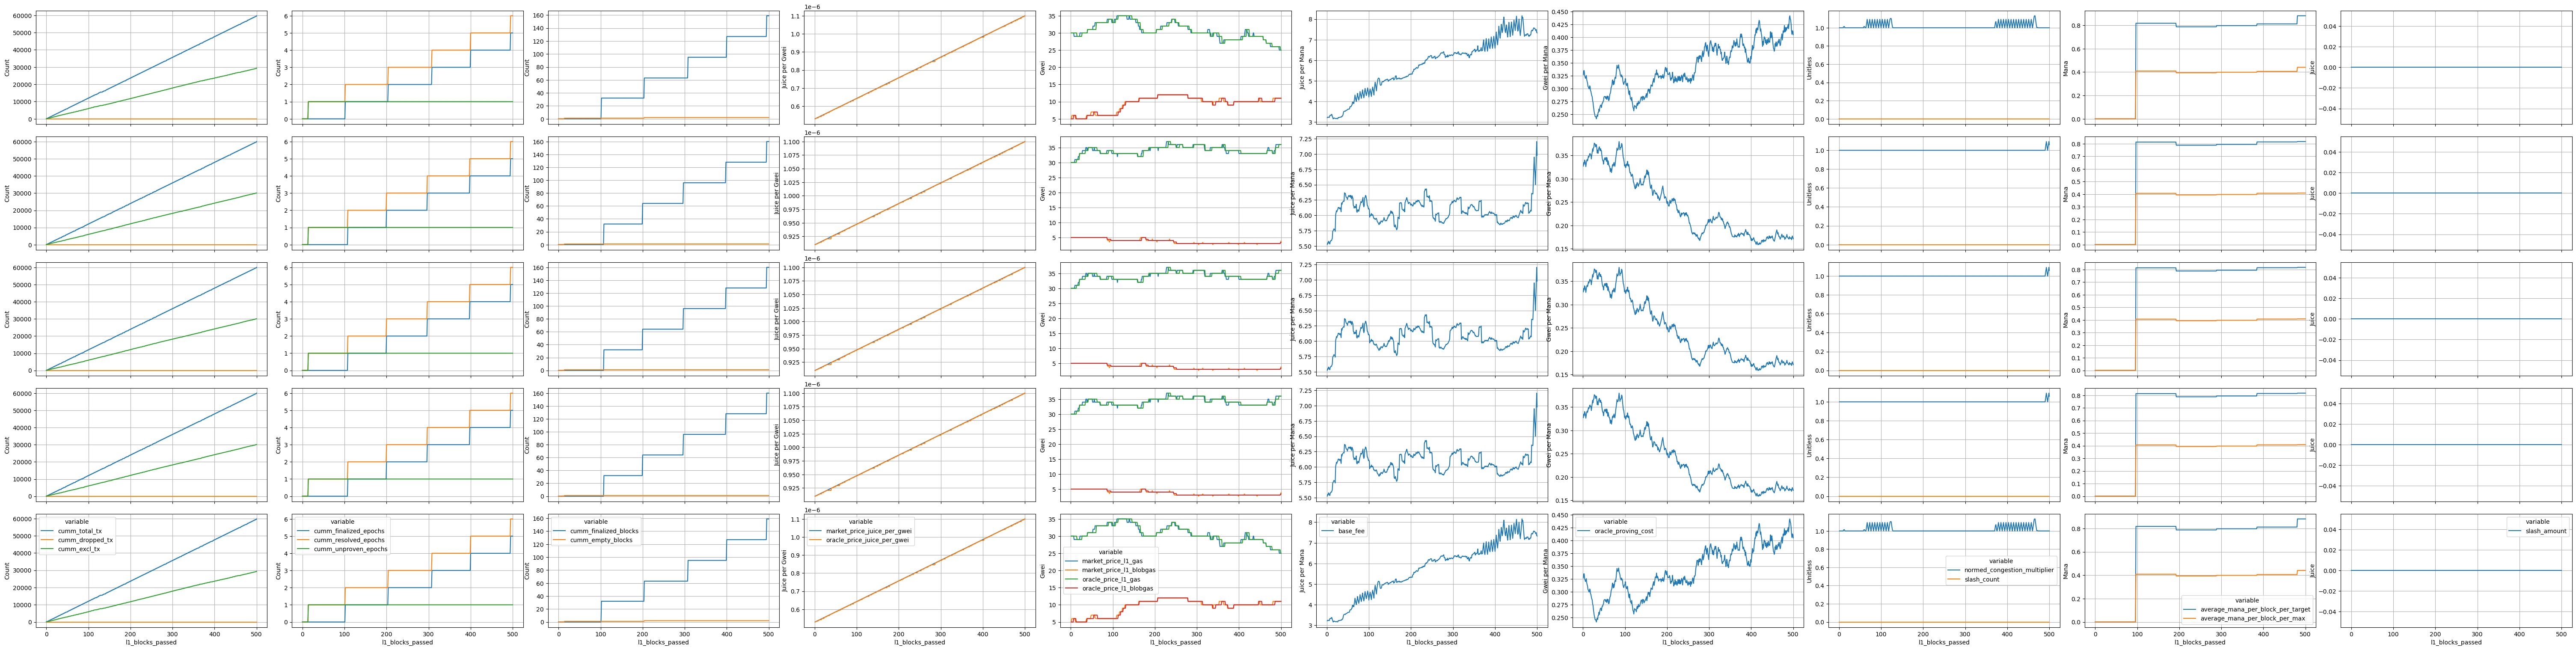

In [7]:
plot_inspect_vars(sim_df[sim_df.JUICE_PER_GWEI_SCENARIO == JuiceGweiExchangeRateScenario.StrictlyIncreasing])

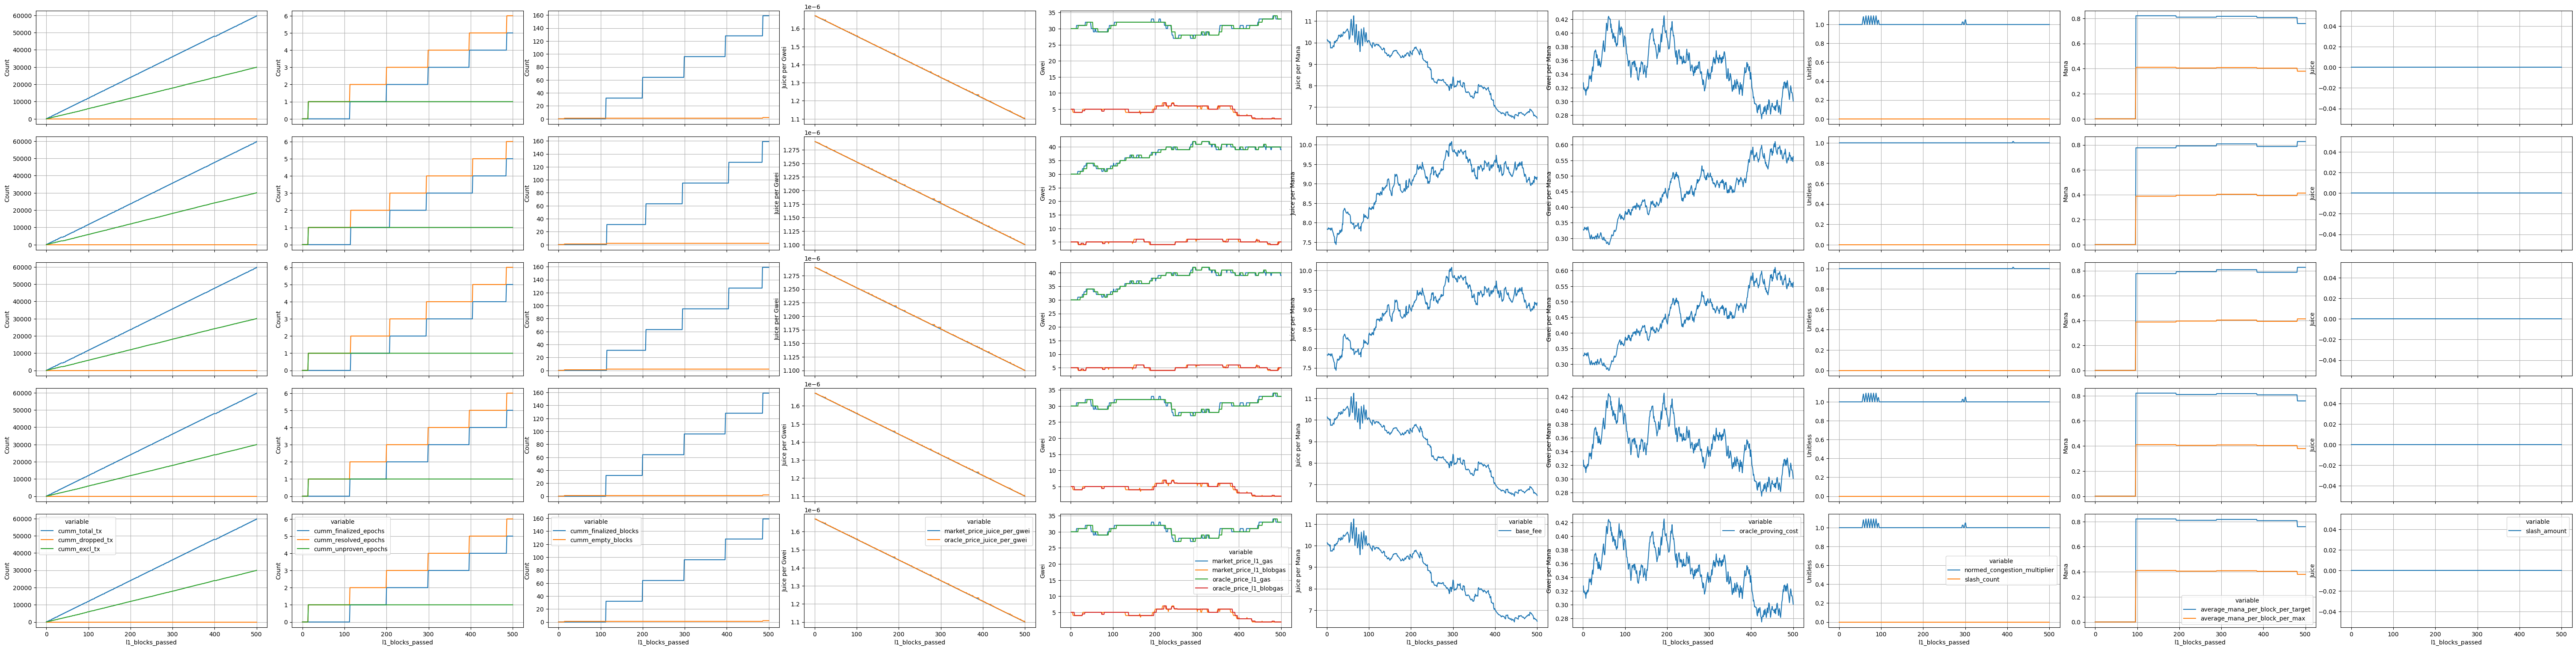

In [8]:
plot_inspect_vars(sim_df[sim_df.JUICE_PER_GWEI_SCENARIO == JuiceGweiExchangeRateScenario.StrictlyDecreasing])

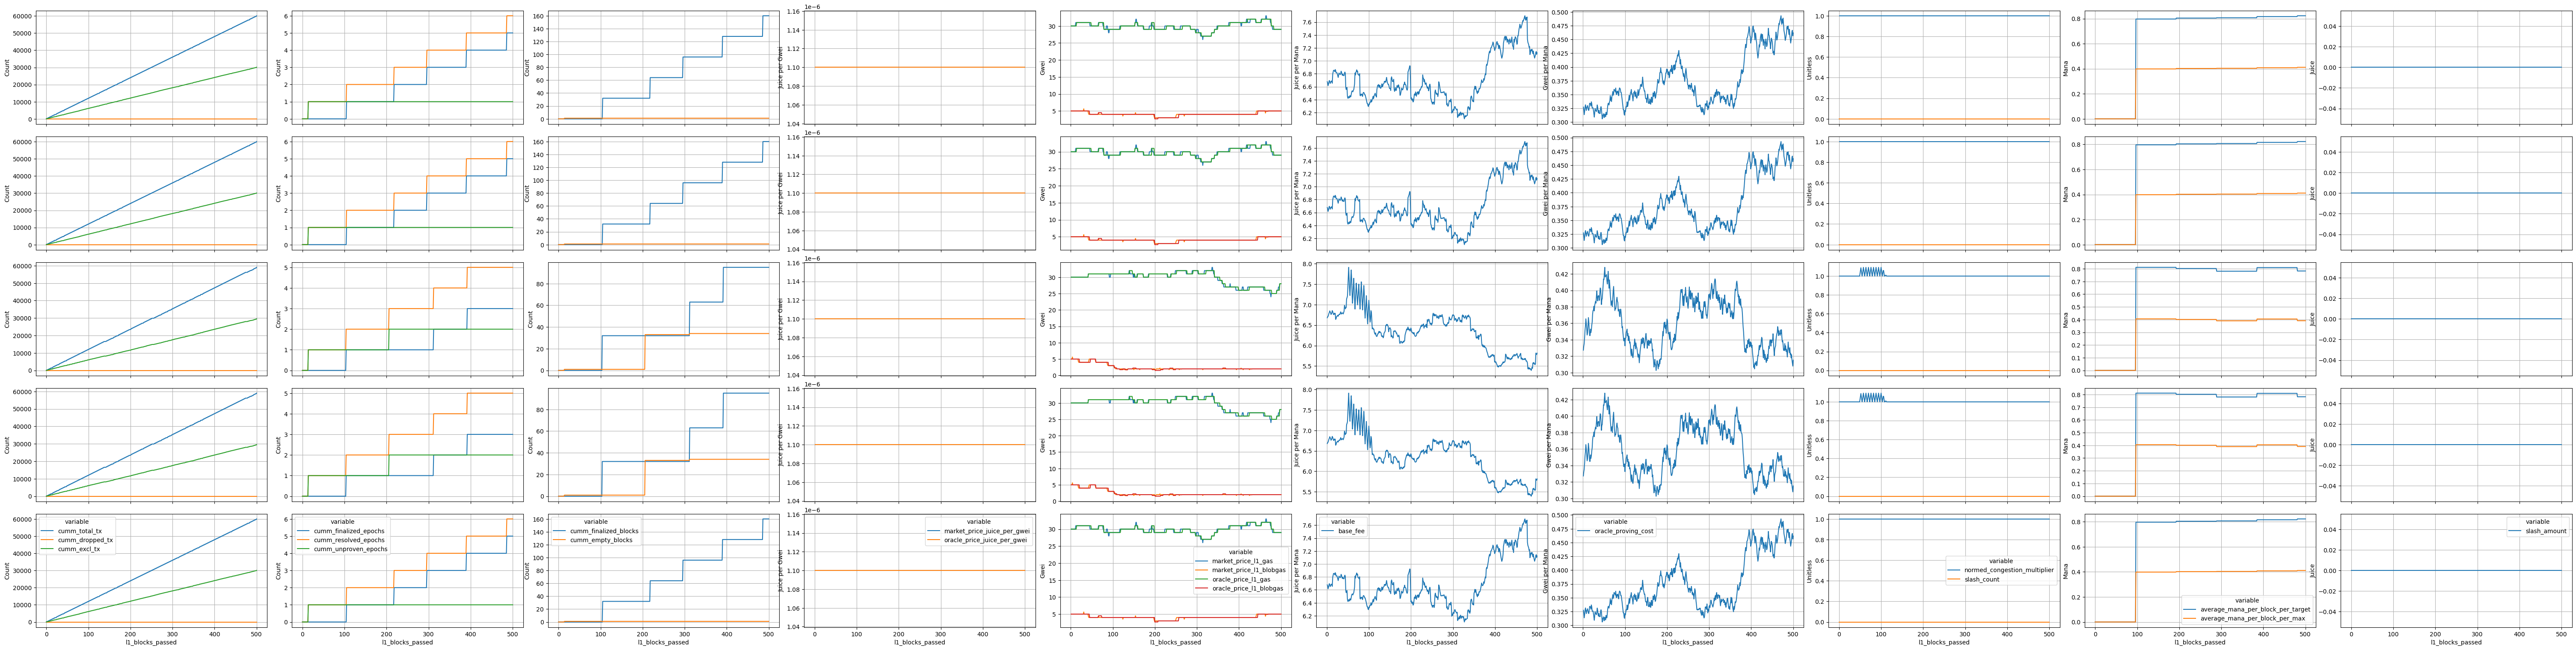

In [9]:
plot_inspect_vars(sim_df[sim_df.JUICE_PER_GWEI_SCENARIO == JuiceGweiExchangeRateScenario.Constant])

In [10]:
traj_df = sim_df.query("simulation == 0 & subset == 0 & run == 1")

In [11]:
def value_at_risk_in_usd(row, q):
    active_stakes_in_epoch = np.array(sorted(row['agents'][a].stake for a in row.current_epoch.validators))
    value_at_risk_in_juice = active_stakes_in_epoch[active_stakes_in_epoch <= np.quantile(active_stakes_in_epoch, q)].sum()
    value_at_risk_in_gwei = value_at_risk_in_juice / row['market_price_juice_per_gwei']
    value_at_risk_in_eth = value_at_risk_in_gwei / 1e9
    value_at_risk_in_usd = value_at_risk_in_eth * row['market_price_eth']

    return value_at_risk_in_eth

In [12]:
i = 5
row = traj_df.iloc[i]
print(row['market_price_juice_per_gwei'])
value_at_risk_in_usd(row, q=0.33)

1.1571553553782149e-06


0.06217633746454642

In [13]:
i = 5
row = traj_df.iloc[i]
value_at_risk_in_usd(row, q=0.50)

0.11546793593735495

In [14]:
i = 5
row = traj_df.iloc[i]
value_at_risk_in_usd(row, q=0.66)

0.173371425900798